# Investigating a large and complex dataset 

#### import the complete dataset into Python

*This week's short assignment is based on a dataset titled 'Climatological Database for the World's Oceans 1750-1850', which contains ~250,000 individual ship's log entries. Detailed information about the data can be found at the [project web site](https://pendientedemigracion.ucm.es/info/cliwoc/). The code examples used in this notebook, and many others exploring the CLIWOC dataset can be found on the [Kaggle Ocean Ship Logbooks page](https://www.kaggle.com/cwiloc/climate-data-from-ocean-ships). * 

In [228]:
import pandas as pd

In [327]:
df = pd.read_csv('data/ships-logs/CLIWOC15.csv', header=0)

#### explore column headings and values

In [230]:
df.columns.values


array(['RecID', 'InstAbbr', 'InstName', 'InstPlace', 'InstLand',
       'NumberEntry', 'NameArchiveSet', 'ArchivePart', 'Specification',
       'LogbookIdent', 'LogbookLanguage', 'EnteredBy', 'DASnumber',
       'ImageNumber', 'VoyageFrom', 'VoyageTo', 'ShipName', 'ShipType',
       'Company', 'OtherShipInformation', 'Nationality', 'Name1', 'Rank1',
       'Name2', 'Rank2', 'Name3', 'Rank3', 'ZeroMeridian', 'StartDay',
       'TimeGen', 'ObsGen', 'ReferenceCourse', 'ReferenceWindDirection',
       'DistUnits', 'DistToLandmarkUnits', 'DistTravelledUnits',
       'LongitudeUnits', 'VoyageIni', 'UnitsOfMeasurement', 'Calendar',
       'Year', 'Month', 'Day', 'DayOfTheWeek', 'PartDay', 'TimeOB',
       'Watch', 'Glasses', 'UTC', 'CMG', 'ShipSpeed', 'Distance',
       'drLatDeg', 'drLatMin', 'drLatSec', 'drLatHem', 'drLongDeg',
       'drLongMin', 'drLongSec', 'drLongHem', 'LatDeg', 'LatMin', 'LatSec',
       'LatHem', 'LongDeg', 'LongMin', 'LongSec', 'LongHem', 'Lat3',
       'Lon3', 'LatI

In [231]:
df.Year.min()


1662

In [232]:
df.Year.max()

1855

In [233]:
df.describe()

,RecID,DASnumber,VoyageIni,Calendar,Year,Month,Day,TimeOB,Glasses,UTC,...,BarTempReading,HumReading,PumpWater,LifeOnBoard,Cargo,ShipAndRig,Biology,WarsAndFights,Illustrations,TrivialCorrection
count,280280.000000,8400.000000,272305.000000,280280.000000,280280.000000,280280.000000,280280.000000,280280.000000,97142.000000,2.802800e+05,...,1243.000000,330.000000,76.000000,280280.000000,280280.000000,280280.000000,280280.000000,280280.000000,280280.000000,280280.000000
mean,140140.500000,5078.048964,17995776.759678,1.983377,1799.093403,6.316937,15.720769,12.191641,7.999650,1.799158e+09,...,39366.605141,1.970000,10.493421,0.015299,0.000903,0.015734,0.007104,0.000475,0.000232,0.016337
std,80910.011062,1750.045078,319710.436738,0.127853,31.962106,3.322824,8.774635,1.921593,0.037962,3.196235e+07,...,101303.440917,1.134259,3.647367,0.122739,0.030031,0.124446,0.083983,0.021778,0.015227,0.126769
min,1.000000,977.200000,16621015.000000,1.000000,1662.000000,1.000000,1.000000,0.000000,2.000000,1.662102e+09,...,26.920000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70070.750000,3984.600000,17750421.000000,2.000000,1774.000000,4.000000,8.000000,12.000000,8.000000,1.774110e+09,...,29.860000,1.200000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140140.500000,4600.300000,17920814.000000,2.000000,1792.000000,6.000000,16.000000,12.000000,8.000000,1.792011e+09,...,30.120000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,210210.250000,7327.200000,18330901.000000,2.000000,1832.000000,9.000000,23.000000,12.000000,8.000000,1.832053e+09,...,74.550000,2.700000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,280280.000000,8296.300000,18550621.000000,2.000000,1855.000000,12.000000,31.000000,23.000000,8.000000,1.855073e+09,...,385100.000000,5.200000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [234]:
df.Nationality.value_counts()

Dutch       125977
British      88346
Spanish      54082
French       10632
Swedish        700
British        213
American       200
Hamburg         68
Danish          62
Name: Nationality, dtype: int64

In [235]:
df.ShipName.value_counts()

PRINCIPE                       2825
LA PRINCESA                    2487
Anthony                        2377
EL REY                         2309
Infanta                        2270
Magdalena                      2226
Batavia                        2118
Bellona                        2078
EL COLON                       1932
Dordrecht                      1882
CORTES                         1754
San Fernando                   1736
Ternate                        1708
Stad Utrecht                   1665
Inglis                         1619
La Cantabria                   1616
Lucipara's                     1552
EL PIZARRO                     1529
EL AGUILA                      1528
Rotterdams Welvaren            1502
Walvisch                       1495
Argo                           1448
Admiraal Jan Evertsen          1427
Vliegende Faam                 1402
Boreas                         1397
Prince Rupert                  1349
EL GRIMALDI                    1347
Castor                      

In [236]:
df.Lon3.values

array([     nan,      nan,      nan, ..., -17.2833, -16.7667, -16.05  ])

In [237]:
df.Lat3.values

array([     nan,      nan,      nan, ...,  38.8167,  37.65  ,  37.4   ])

In [238]:
df.groupby('SeaIce').size()

SeaIce
0    279016
1      1264
dtype: int64

In [239]:
df.Biology.unique()

array([0, 1], dtype=int64)

In [337]:
dfString = df.applymap(str)

In [240]:
df.BiologyMemo.unique()

array([nan, 'ECLIPSE DE LUNA',
       "HACEN UNA OBSERVACION APROVECHANDO UN ECLIPSE DE LUNA QUE LOS PONE 11\xc2\xba 20' MAS ORIENTALES, ESTO ES 170\xc2\xba 5' DE LONGITUD.",
       ..., 'zagen kroost drijven en vliegende visch',
       'Zagen een zeer mooie regenboog van de maan',
       'zagen een witte walvisch'], dtype=object)

In [241]:
df.WarsAndFightsMemo.unique()

array([nan, 'formed a line of battle.', 'Discontinued line of battle',
       'Split the main Topsail at 8. At 4 carried away the clue of the main Topsail. Employed heaving the Quarterdeck forecastle and the remainder of the main deck guns overboard to ease the ship. She gaining on us. Spilt the foresail and blew all to pieces',
       'made line of battle', 'Made line of battle',
       'made the line of battle',
       'war declared between England and Denmark, peace concluded between Russia and France',
       'Abigail informed us hostilities had commenced between us and Russia, that 40 of our ships of war were lying in the downs and numbers of cruisers in the channel',
       'A battle', 'maken de munitie gereed om onst te kunnen verdedigen',
       'zetten de geweerkisten omlaag in het achterluik, exerceren met het geschut en handgeweer',
       'maakten bij het naderen van de spaanse brik alles klaar voor de defensie. Haalden het oude kruit af en laadden opnieuw (met scherp)',
  

#### create some plots to explore the data

In [242]:
import numpy as np
import matplotlib.pyplot as plt

In [243]:
# This code by Ramiro Gomez
# https://www.kaggle.com/ramirogomez/d/cwiloc/climate-data-from-ocean-ships/ocean-ship-logs
%matplotlib inline

from mpl_toolkits.basemap import Basemap


# Input data files are available in the "../input/" directory.
!ls data/ships-logs/

CLIWOC15.csv
Geodata.csv
Lookup_ES_WindDirection.csv
Lookup_ES_WindForce.csv
Lookup_FR_WindDirection.csv
Lookup_FR_WindForce.csv
Lookup_NL_WindDirection.csv
Lookup_NL_WindForce.csv
Lookup_UK_WindDirection.csv
Lookup_UK_WindForce.csv
Magnetic_Declinations.csv
ShipLogbookID.csv
Weather.csv


In [257]:
df = pd.read_csv('data/ships-logs/CLIWOC15.csv', usecols=['Lat3', 'Lon3', 'Nationality'])
df.dropna(axis=0, how='any', inplace=True)
df.shape

(252917, 3)

In [258]:
df.columns.values

array(['Nationality', 'Lat3', 'Lon3'], dtype=object)

In [259]:
df = df[(df.Lat3.notnull()) & (df.Lon3.notnull())]

In [260]:
df.shape

(252917, 3)

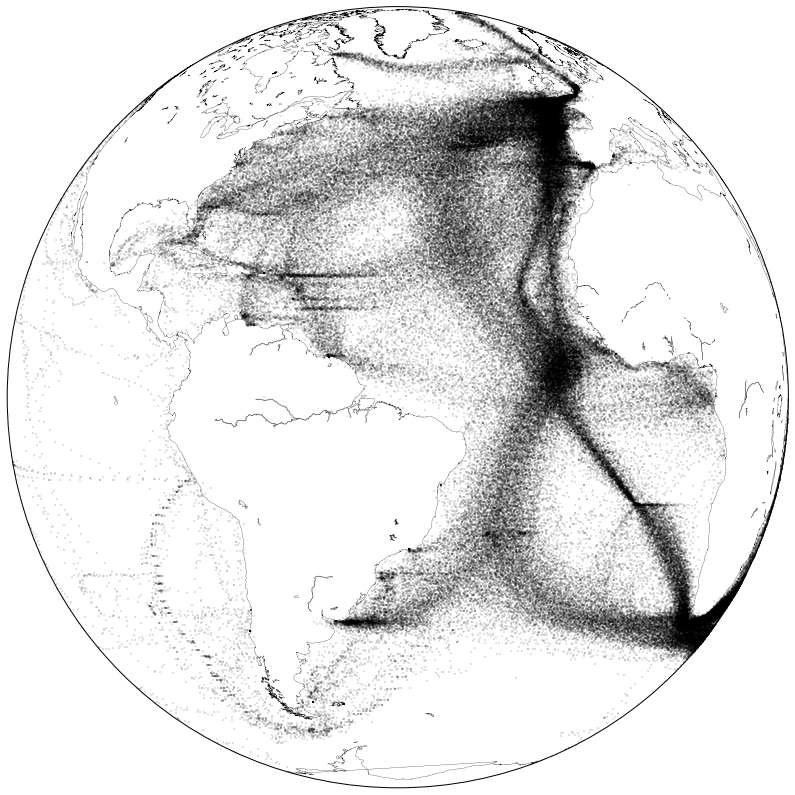

In [261]:
fig = plt.figure(figsize=(20, 14))
markersize = .5
markertype = '.'
markercolor = '#000000'
markeralpha = .4

m = Basemap(projection='ortho',lat_0=0,lon_0=-45,resolution='l')
m.drawcoastlines(linewidth=0.25)
# m.drawcountries(linewidth=0.25)
# m.fillcontinents(color='coral',lake_color='aqua')

# Avoid border around map.
# m.drawmapboundary(fill_color='#ffffff', linewidth=.0)

# Convert locations to x/y coordinates and plot them as dots.
x, y = m(df.Lon3.values, df.Lat3.values)
m.scatter(x, y, markersize, marker=markertype, color=markercolor, alpha=markeralpha)
plt.show()

In [262]:
nationList = df.Nationality.unique()

In [263]:
nationList = nationList.tolist()

In [264]:
type(nationList)

list

In [265]:
import matplotlib.cm as cm

In [266]:
def assign_colours (row):
   if row['Nationality'] in nationList:
      return cm.hot(nationList.index(row['Nationality'])/10.,1)
   return cm.hot(9/10.,1)

In [267]:
df.apply (lambda row: assign_colours (row),axis=1)

12                (0.0416, 0.0, 0.0, 1.0)
13                (0.0416, 0.0, 0.0, 1.0)
14                (0.0416, 0.0, 0.0, 1.0)
15                (0.0416, 0.0, 0.0, 1.0)
16                (0.0416, 0.0, 0.0, 1.0)
17                (0.0416, 0.0, 0.0, 1.0)
18                (0.0416, 0.0, 0.0, 1.0)
19                (0.0416, 0.0, 0.0, 1.0)
20                (0.0416, 0.0, 0.0, 1.0)
21                (0.0416, 0.0, 0.0, 1.0)
22                (0.0416, 0.0, 0.0, 1.0)
23                (0.0416, 0.0, 0.0, 1.0)
24                (0.0416, 0.0, 0.0, 1.0)
25                (0.0416, 0.0, 0.0, 1.0)
26                (0.0416, 0.0, 0.0, 1.0)
27                (0.0416, 0.0, 0.0, 1.0)
28                (0.0416, 0.0, 0.0, 1.0)
29                (0.0416, 0.0, 0.0, 1.0)
30                (0.0416, 0.0, 0.0, 1.0)
31                (0.0416, 0.0, 0.0, 1.0)
32                (0.0416, 0.0, 0.0, 1.0)
33                (0.0416, 0.0, 0.0, 1.0)
34                (0.0416, 0.0, 0.0, 1.0)
35                (0.0416, 0.0, 0.

In [268]:
df['nation_colours'] = df.apply (lambda row: assign_colours (row),axis=1)

In [269]:
df.nation_colours

12                (0.0416, 0.0, 0.0, 1.0)
13                (0.0416, 0.0, 0.0, 1.0)
14                (0.0416, 0.0, 0.0, 1.0)
15                (0.0416, 0.0, 0.0, 1.0)
16                (0.0416, 0.0, 0.0, 1.0)
17                (0.0416, 0.0, 0.0, 1.0)
18                (0.0416, 0.0, 0.0, 1.0)
19                (0.0416, 0.0, 0.0, 1.0)
20                (0.0416, 0.0, 0.0, 1.0)
21                (0.0416, 0.0, 0.0, 1.0)
22                (0.0416, 0.0, 0.0, 1.0)
23                (0.0416, 0.0, 0.0, 1.0)
24                (0.0416, 0.0, 0.0, 1.0)
25                (0.0416, 0.0, 0.0, 1.0)
26                (0.0416, 0.0, 0.0, 1.0)
27                (0.0416, 0.0, 0.0, 1.0)
28                (0.0416, 0.0, 0.0, 1.0)
29                (0.0416, 0.0, 0.0, 1.0)
30                (0.0416, 0.0, 0.0, 1.0)
31                (0.0416, 0.0, 0.0, 1.0)
32                (0.0416, 0.0, 0.0, 1.0)
33                (0.0416, 0.0, 0.0, 1.0)
34                (0.0416, 0.0, 0.0, 1.0)
35                (0.0416, 0.0, 0.

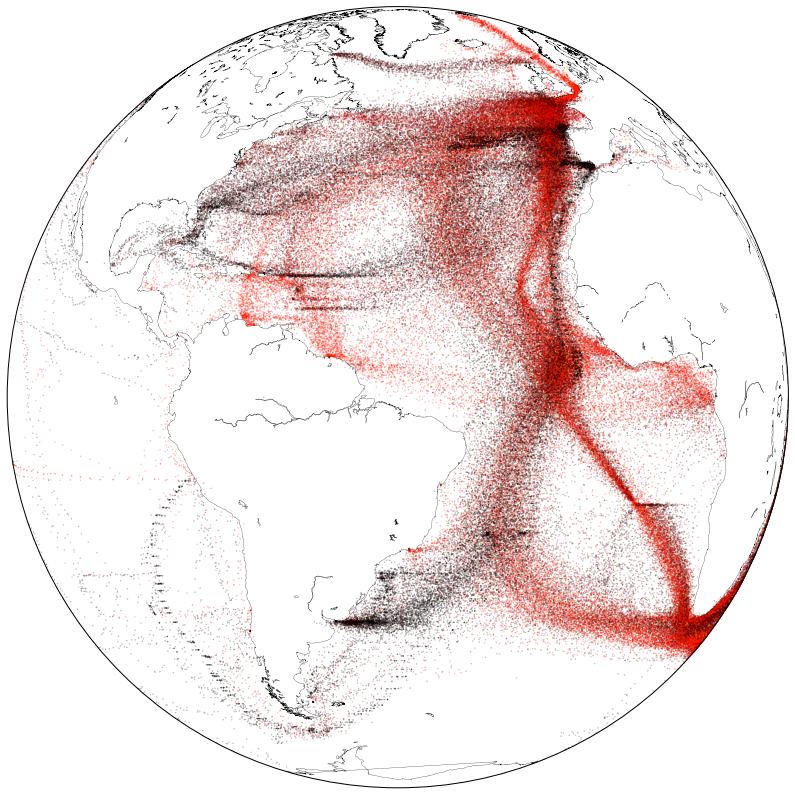

In [273]:
figColour = plt.figure(figsize=(20, 14))
markersize = .5
markertype = '.'
# markercolor = '#000000'
markeralpha = .4

mColour = Basemap(projection='ortho',lat_0=0,lon_0=-45,resolution='l')
mColour.drawcoastlines(linewidth=0.25)
# m.drawcountries(linewidth=0.25)
# m.fillcontinents(color='coral',lake_color='aqua')

# Avoid border around map.
# m.drawmapboundary(fill_color='#ffffff', linewidth=.0)

# Convert locations to x/y coordinates and plot them as dots.
x, y = mColour(df.Lon3.values, df.Lat3.values)
#markercolor = m(df.nation_colours)
mColour.scatter(x, y, markersize, marker=markertype, color=df.nation_colours, alpha=markeralpha)
plt.show()

In [275]:
df = pd.read_csv('CLIWOC15.csv', header=0)

In [276]:
dfNew = df[(df.ShipName == 'Endeavour') & (df.Lat3.notnull()) & (df.Lon3.notnull())]

In [277]:
dfNew.describe()

,RecID,DASnumber,VoyageIni,Calendar,Year,Month,Day,TimeOB,Glasses,UTC,...,BarTempReading,HumReading,PumpWater,LifeOnBoard,Cargo,ShipAndRig,Biology,WarsAndFights,Illustrations,TrivialCorrection
count,355.000000,0,355.000000,355,355.000000,355.000000,355.000000,355,0,3.550000e+02,...,0,0,0,355,355,355,355,355,355,355.000000
mean,15388.267606,NaN,17695209.732394,2,1769.501408,5.825352,15.259155,12,NaN,1.769561e+09,...,NaN,NaN,NaN,0,0,0,0,0,0,0.008451
std,2971.998773,NaN,12465.008283,0,1.245046,3.548363,9.148826,0,NaN,1.224833e+06,...,NaN,NaN,NaN,0,0,0,0,0,0,0.091668
min,14882.000000,NaN,17680827.000000,2,1768.000000,1.000000,1.000000,12,NaN,1.768083e+09,...,NaN,NaN,NaN,0,0,0,0,0,0,0.000000
25%,14983.500000,NaN,17681208.000000,2,1768.000000,3.000000,7.000000,12,NaN,1.768123e+09,...,NaN,NaN,NaN,0,0,0,0,0,0,0.000000
50%,15074.000000,NaN,17690127.000000,2,1769.000000,5.000000,15.000000,12,NaN,1.769041e+09,...,NaN,NaN,NaN,0,0,0,0,0,0,0.000000
75%,15162.500000,NaN,17710117.000000,2,1771.000000,9.000000,23.500000,12,NaN,1.771030e+09,...,NaN,NaN,NaN,0,0,0,0,0,0,0.000000
max,43174.000000,NaN,17710417.000000,2,1771.000000,12.000000,31.000000,12,NaN,1.771071e+09,...,NaN,NaN,NaN,0,0,0,0,0,0,1.000000


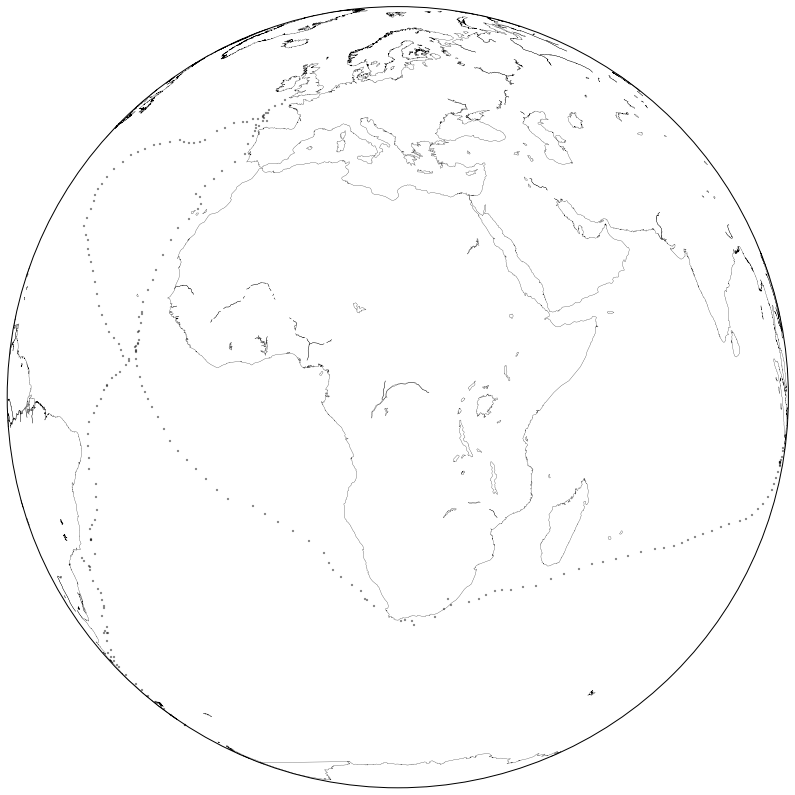

In [278]:
fig = plt.figure(figsize=(20, 14))
markersize = 7
markertype = '.'
markercolor = '#000000'
markeralpha = .4

m = Basemap(projection='ortho',lat_0=0,lon_0=20,resolution='l')
m.drawcoastlines(linewidth=0.25)
# m.drawcountries(linewidth=0.25)
# m.fillcontinents(color='coral',lake_color='aqua')

# Avoid border around map.
# m.drawmapboundary(fill_color='#ffffff', linewidth=.0)

# Convert locations to x/y coordinates and plot them as dots.
x, y = m(dfNew.Lon3.values, dfNew.Lat3.values)
m.scatter(x, y, markersize, marker=markertype, color=markercolor, alpha=markeralpha)
plt.show()

In [283]:
# based on code by Peter Hewitt
# https://www.kaggle.com/hewettp/d/cwiloc/climate-data-from-ocean-ships/sea-ice-latitude-vs-day-of-year/code

In [293]:
df = pd.read_csv('CLIWOC15.csv', header=0, parse_dates={'Date':['Year', 'Month', 'Day']})

In [294]:
df.groupby('SeaIce').size()

SeaIce
0    279016
1      1264
dtype: int64

In [295]:
df = df[(df.SeaIce == 1) & (df.LatDeg.notnull())]

In [296]:
df.columns.values

array(['Date', 'RecID', 'InstAbbr', 'InstName', 'InstPlace', 'InstLand',
       'NumberEntry', 'NameArchiveSet', 'ArchivePart', 'Specification',
       'LogbookIdent', 'LogbookLanguage', 'EnteredBy', 'DASnumber',
       'ImageNumber', 'VoyageFrom', 'VoyageTo', 'ShipName', 'ShipType',
       'Company', 'OtherShipInformation', 'Nationality', 'Name1', 'Rank1',
       'Name2', 'Rank2', 'Name3', 'Rank3', 'ZeroMeridian', 'StartDay',
       'TimeGen', 'ObsGen', 'ReferenceCourse', 'ReferenceWindDirection',
       'DistUnits', 'DistToLandmarkUnits', 'DistTravelledUnits',
       'LongitudeUnits', 'VoyageIni', 'UnitsOfMeasurement', 'Calendar',
       'DayOfTheWeek', 'PartDay', 'TimeOB', 'Watch', 'Glasses', 'UTC',
       'CMG', 'ShipSpeed', 'Distance', 'drLatDeg', 'drLatMin', 'drLatSec',
       'drLatHem', 'drLongDeg', 'drLongMin', 'drLongSec', 'drLongHem',
       'LatDeg', 'LatMin', 'LatSec', 'LatHem', 'LongDeg', 'LongMin',
       'LongSec', 'LongHem', 'Lat3', 'Lon3', 'LatInd', 'LonInd',
       '

In [297]:
df['DOY'] = pd.to_datetime(df.Date).dt.dayofyear

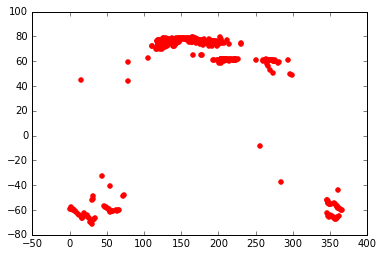

In [299]:
plt.scatter(df.DOY, df.Lat3, color='r')

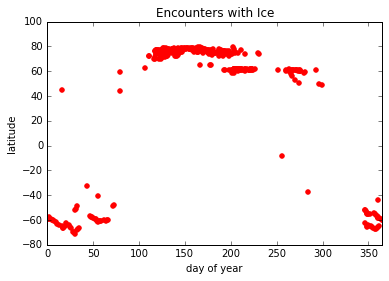

In [300]:
plt.xlim(0, 365)
plt.title('Encounters with Ice')
plt.xlabel('day of year')
plt.ylabel('latitude')
plt.legend(loc='lower left')
plt.scatter(df.DOY, df.Lat3, color='r', label='North hemisphere')